<a href="https://colab.research.google.com/github/mohadi21/Projet-Business-Intelligence/blob/main/BI_DBLP_new_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet** : Business Intelligence

Mohamed Abdelhadi BOUDJEMAI

Les importation 

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import numpy as np
import matplotlib.pyplot as plt
import community 
import networkx as nx 
#from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# PARTIE 1:TRAITEMENT DES DONNEES ET CONSTRUCTION DES **MATRICES**

traitements de données (traitement de texte) afin d’extraire les informations
séparément sous forme d’un dataframe. 

le traitement est fait sur la machine pas sur colab a cause du volume du ficher texte 
le code du traitement est sur le 2èeme fichier phthon 


fichier txt 
DBLP_new_version

In [ ]:
import pandas as pd
#chargement des données 
path = "/content/articleEntier.csv"
#data = pd.read_csv(path)


chargement et nettoyage

In [ ]:
print(data.shape)
print(data.columns.values)


(596277, 9)
['Venue' 'Year' 'Authors' 'Title' 'NbrAuthor' 'Id' 'ListCitations'
 'NbrCitation' 'Abstract']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596277 entries, 0 to 596276
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Venue          596276 non-null  object
 1   Year           596277 non-null  int64 
 2   Authors        591883 non-null  object
 3   Title          596277 non-null  object
 4   NbrAuthor      596277 non-null  int64 
 5   Id             596277 non-null  int64 
 6   ListCitations  149743 non-null  object
 7   NbrCitation    596277 non-null  int64 
 8   Abstract       198887 non-null  object
dtypes: int64(4), object(5)
memory usage: 40.9+ MB


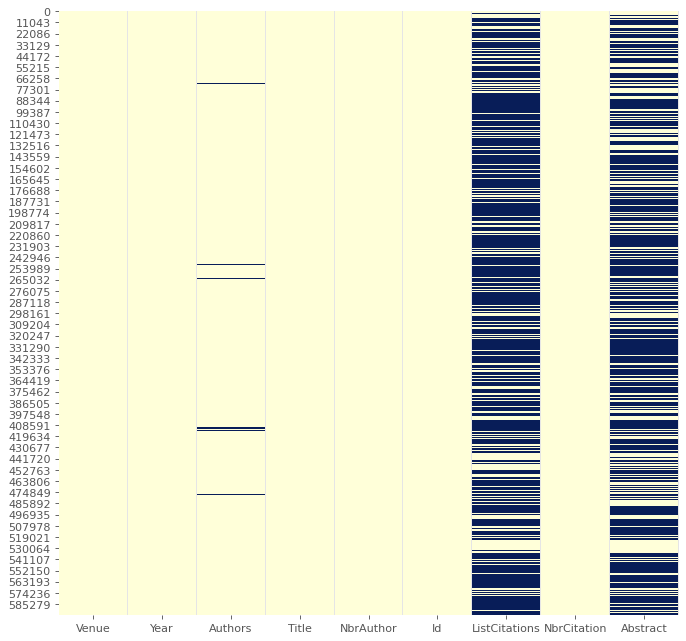

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [ ]:
Total=data.isnull().sum().sort_values(ascending=False)
Percent=round(Total/len(data)*100,2)
pd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
#citation, resume et la colonne auteurs ont des données manquantes

,Total,Percent
ListCitations,446534,74.89
Abstract,397390,66.65
Authors,4394,0.74
Venue,1,0.00
NbrCitation,0,0.00
Id,0,0.00
NbrAuthor,0,0.00
Title,0,0.00
Year,0,0.00


In [ ]:
data.describe()

,Year,NbrAuthor,Id,NbrCitation
count,596277.000000,596277.000000,5.962770e+05,596277.0
mean,2000.199273,2.435331,8.925150e+05,0.0
std,8.385096,1.546302,1.721305e+05,0.0
min,1936.000000,0.000000,5.943770e+05,0.0
25%,1997.000000,1.000000,7.434460e+05,0.0
50%,2003.000000,2.000000,8.925150e+05,0.0
75%,2006.000000,3.000000,1.041584e+06,0.0
max,2009.000000,88.000000,1.190653e+06,0.0


In [ ]:

plt.style.use('classic')
abstract_vectorizer = CountVectorizer(max_features=2500, lowercase=True, ngram_range=(1,1), analyzer="word")
title_vectorizer = CountVectorizer(max_features=1900, lowercase=True, ngram_range=(1,1),analyzer="word")
stop_word = stopwords.words('french') + stopwords.words('english') + ["présentons", "présente", "résultats","comme","dune", 'dun', 'afin','entre', 'article','ainsi','partir', 'plus','très', 'approche','méthodes', 'méthode','données', 'proposons','permet' ,'deux']

stop_word = np.unique(stop_word).tolist()
print ((stop_word))

['a', 'about', 'above', 'afin', 'after', 'again', 'against', 'ai', 'aie', 'aient', 'aies', 'ain', 'ainsi', 'ait', 'all', 'am', 'an', 'and', 'any', 'approche', 'are', 'aren', "aren't", 'article', 'as', 'at', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', 'ce', 'ces', 'comme', 'couldn', "couldn't", 'd', 'dans', 'de', 'des', 'deux', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'données', 'down', 'du', 'dun', 'dune', 'during', 'each', 'elle', 'en', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'few', 'for', 'from', 'furent', 'further', 'fus', 'fu

Sélection des trois ‘Venues’ suivante SIGIR, SIGMOD et STOC.

In [ ]:
df = data[(data["Venue"] == "SIGIR") | (data["Venue"] == "SIGMOD") | (data["Venue"] == "STOC")]
df

,Venue,Year,Authors,Title,NbrAuthor,Id,ListCitations,NbrCitation,Abstract
0,SIGIR,2006,"Krisztian Balog,Leif Azzopardi,Maarten de Rijke",Formal models for expert finding in enterprise...,3,594377,"595386,362694,772628,595551,26506,594777,93596...",0,Searching an organization's document reposito...
1,SIGIR,1992,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",Latent Semantic Indexing is an Optimal Special...,3,594378,"771904,2025",0,Latent Semantic Indexing (LSI) is a technique...
2,SIGIR,2000,Rie Kubota Ando,Latent semantic-space: iterative scaling impro...,1,594379,"937405,594378,243650,594808,594831,771716,4150...",0,We present a novel algorithm that creates doc...
3,SIGIR,1994,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",Automatic Combination of Multiple Ranked Retri...,3,594380,"1120095,772280,595299,936910,1120350,595944",0,NaN
4,SIGIR,1988,"Christine Barthes,Pierre Glize",Planning in an Expert System for Automated Inf...,2,594381,"595655,594818,594757,3446",0,Searching online databases requires an inform...
...,...,...,...,...,...,...,...,...,...
4419,STOC,2008,"Lance Fortnow,Rahul Santhanam",Infeasibility of instance compression and succ...,2,623444,"621767,622324,1059776,622528,211992,861913,209...",0,"The OR-SAT problem asks, given Boolean formul..."
4420,STOC,2008,"Christian Borgs,Jennifer T. Chayes,Nicole Immo...",The myth of the folk theorem.,6,623445,"592916,857255,972738,592841,622864,212050,2121...",0,"A well-known result in game theory known as ""..."
4421,STOC,2008,"Nicolas Gama,Phong Q. Nguyen",Finding short lattice vectors within mordell's...,2,623446,"622392,75164,1094462,449760,621242,204543,6211...",0,The celebrated Lenstra-Lenstra-Lovász lattice...
4422,STOC,2008,Jennifer Rexford,Rethinking internet routing.,1,623447,NaN,0,Internet routing introduces many interesting ...


les importions  

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import wordcloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Construction des matrices Documents-termes pour les titres des articles ainsi que pour les résumés
(abstract)

In [ ]:
nan_value = float("NaN") 
df.replace("", nan_value, inplace=True)
df = df.dropna(subset=["Abstract"])
df["Abstract"] = df["Abstract"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["Abstract"] = df["Abstract"].replace(r"[^\w\s]", " ")
df["Abstract"] = df["Abstract"].apply(lambda x: " ".join(x for x in x.split(" ") if x not in stop_word))
df['Abstract'] = df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Abstract'] =df['Abstract'] .str.replace('[\d]','')
df_abstract = df["Abstract"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Bag of word sur les abstract et calcule de la co occurence (doc x doc)

In [ ]:
abstract_term_count = abstract_vectorizer.fit_transform(df_abstract)
dense_ab_term_count = abstract_term_count.todense()
abstract_mat = dense_ab_term_count.dot(dense_ab_term_count.transpose())
abstract_mat.shape

(2795, 2795)

Nettoyage des titres

In [ ]:
df = df.dropna(subset=["Title"])
df["Title"] = df["Title"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["Title"] = df["Title"].replace(r"[^\w\s]", " ")
df["Title"] = df["Title"].apply(lambda x: " ".join(x for x in x.split(" ") if x not in stop_word))
df['Title'] = df['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Title'] =df['Title'] .str.replace('[\d]','')
df_title = df["Title"]

In [ ]:
title_term_count = title_vectorizer.fit_transform(df_title)
dense_tit_term_count = title_term_count.todense()
title_mat = dense_tit_term_count.dot(dense_tit_term_count.transpose())
#id_auteurs.to_csv(r'id_auteurs.csv', index=False, header=True)
title_mat.shape

(2795, 2795)

Construction de  la matrice Documents-auteurs

In [ ]:
def splitauthor(authors):
  temp = authors.lower()
  splitted_authors = []
  for author in temp.split(","):
    splitted_authors.append(author.strip())
  return splitted_authors


liste des auteurs et calcule de la coocurrence des auteurs pour chaque doc

In [ ]:
df=df.dropna(subset=['Authors'])
df["splitted_authors"] = df["Authors"].apply(splitauthor)

all_authors = []
for index, row in df.iterrows():
  for author in row["splitted_authors"]:
    if author not in all_authors:
      all_authors.append(author)

dense_doc_aut_count = np.zeros((len(df), len(all_authors)), dtype=int)
author_map = {x:i for i,x in enumerate(all_authors)}

for index, row in df.reset_index().iterrows():
  for author in row["splitted_authors"]:
    dense_doc_aut_count[index, author_map[author]] = 1

In [ ]:
len(all_authors)

3400

In [ ]:
author_mat = dense_doc_aut_count.dot(dense_doc_aut_count.transpose())
author_mat.shape
#author_mat.to_csv(r'auteur_mat.csv', index=False, header=True)

(2792, 2792)

Génération des fichiers CSV

In [ ]:
doc_auteurs = pd.DataFrame(dense_doc_aut_count)
doc_auteurs["id"] = doc_auteurs.index
doc_auteurs.to_csv(r'aut.csv', index=False, header=True)
doc_t_tit = pd.DataFrame(dense_tit_term_count)
doc_t_tit["id"] = doc_t_tit.index
doc_t_tit.to_csv(r'tit_ter.csv', index=False, header=True)
doc_t_abs = pd.DataFrame(dense_ab_term_count)
doc_t_abs["id"] = doc_t_abs.index
doc_t_abs.to_csv(r'abs_ter.csv', index=False, header=True)

In [ ]:
id_auteurs = pd.DataFrame({'auteurs':all_authors})
id_auteurs["id_auteurs"] = id_auteurs.index
id_auteurs.to_csv(r'id_auteurs.csv', index=False, header=True)
id_auteurs

,auteurs,id_auteurs
0,krisztian balog,0
1,leif azzopardi,1
2,maarten de rijke,2
3,brian t. bartell,3
4,garrison w. cottrell,4
...,...,...
3395,craig gentry,3395
3396,vahab s. mirrokni,3396
3397,nicolas gama,3397
3398,phong q. nguyen,3398


# ***Partie 3:***

In [ ]:
df=df.dropna(subset=['ListCitations'])
df["splitted_cita"] = df["ListCitations"].apply(splitauthor)
df["splitted_cita"]

0    [0    0               series([]\n1     name: l...
1    [0    0               series([]\n1     name: l...
2    [0    0               series([]\n1     name: l...
Name: splitted_cita, dtype: object

In [ ]:
# Traitement des citations
all_citations = []
for index, row in df.iterrows():
  for citation in row['splitted_cita']:
    if citation not in all_citations:
      all_citations.append(citation)

print(all_citations)
#Matrice Citations
doc_citation=np.zeros((len(df), len(all_citations)), dtype=int)
author_map = {x:i for i,x in enumerate(all_citations)}

for index, row in df.reset_index().iterrows():
  for citation in row["splitted_cita"]:
    doc_citation[index, author_map[citation]] = 1 

print(doc_citation)


['0    0               series([]\\n1     name: listcit...\n1    0               series([]\\n1     name: listcit...\n2    0               series([]\\n1     name: listcit...\nname: listcitations', 'dtype: object']
[[1 1]
 [1 1]
 [1 1]]


Construction des graphes co-termes (titre), co-termes (abstract), co-auteurs

In [ ]:
from random import choice
import random
random.seed(10)
################################################################# 
# Detection de communautés: application de l'algorithme de Louvain 
g_doc_term = nx.from_numpy_matrix(abstract_mat)
g_tit_term = nx.from_numpy_matrix(title_mat)
g_doc_auth = nx.from_numpy_array(author_mat)

partition_doc_term = community.best_partition(g_doc_term) 
partition_tit_term = community.best_partition(g_tit_term)
partition_doc_auth = community.best_partition(g_doc_auth)


print("partition doc term", partition_doc_term) 
print("partition title term", partition_tit_term) 
print("partition doc author", partition_doc_auth) 

# Calcul de la modularité liée à cette parition 
modularity_value_doc_term = community.modularity(partition_doc_term, g_doc_term) 
modularity_value_tit_term = community.modularity(partition_tit_term, g_tit_term) 
modularity_value_doc_auth = community.modularity(partition_doc_auth, g_doc_auth)

print("modularity_value_doc_term", modularity_value_doc_term) 
print("modularity_value_tit_term", modularity_value_tit_term) 

print("modularity_value_doc_auth", modularity_value_doc_auth) 




partition doc term {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 1, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 2, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 3, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 13

vect_label {0, 1, 2, 3, 4}
size 5


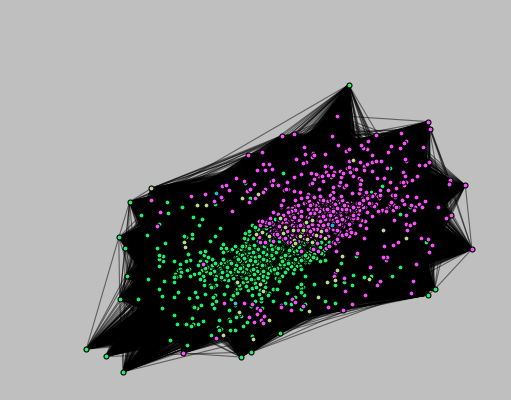

In [ ]:
# Visulalisation du nombre de communautés retrouvé 
vect_label = set(partition_doc_term.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_doc_term.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_doc_term) 
count = 0 
for com in set(partition_doc_term.values()) : 
    list_nodes = [nodes for nodes in partition_doc_term.keys() if partition_doc_term[nodes] == com]        
    nx.draw_networkx_nodes(g_doc_term, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_doc_term, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

vect_label {0, 1, 2, 3, 4, 5, 6}
size 7


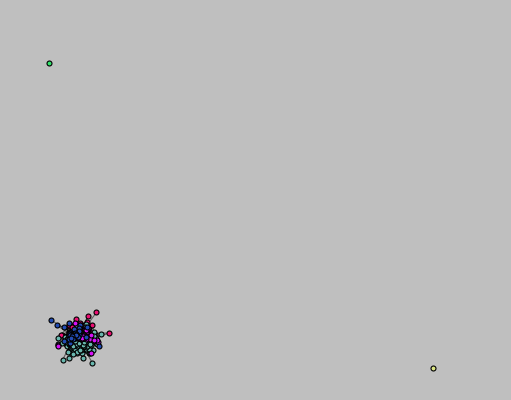

In [ ]:
# Visulalisation du nombre de communautés retrouvé 
vect_label = set(partition_tit_term.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_tit_term.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_tit_term) 
count = 0 
for com in set(partition_tit_term.values()) : 
    list_nodes = [nodes for nodes in partition_tit_term.keys() if partition_tit_term[nodes] == com]        
    nx.draw_networkx_nodes(g_tit_term, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_tit_term, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

vect_label {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

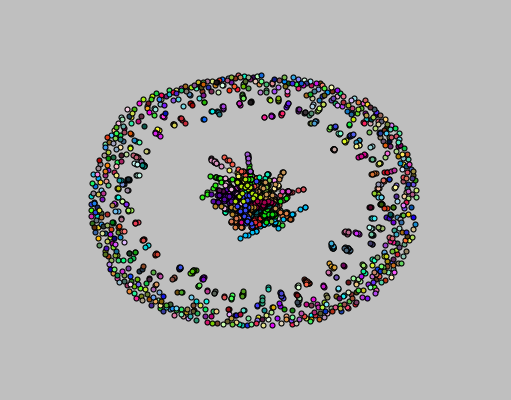

In [ ]:
# Visulalisation du nombre de communautés retrouvé 
vect_label = set(partition_doc_auth.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_doc_auth.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_doc_auth) 
count = 0 
for com in set(partition_doc_auth.values()) : 
    list_nodes = [nodes for nodes in partition_doc_auth.keys() if partition_doc_auth[nodes] == com]        
    nx.draw_networkx_nodes(g_doc_auth, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_doc_auth, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

# *** CLUSTERING ET PARTITIONS***

clustering à l’aide à l’aide de l’algorithme de Louvain

In [ ]:
pip install python-louvain

In [ ]:
pip install cluster_ensembles

     |████████████████████████████████| 5.3MB 8.1MB/s 
  Created wheel for cluster-ensembles: filename=Cluster_Ensembles-1.16-cp36-none-any.whl size=5331377 sha256=12cb3cd1a56252642c1889970d942afa462e6c9883311aaca2697258bf59e0cc
  Stored in directory: /root/.cache/pip/wheels/3f/fb/2b/60b8a4ab88c9327943ad194237635f071c64dc11f36e86b3fd
Successfully built cluster-ensembles


In [ ]:
!sudo apt-get install metis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmetis5
The following NEW packages will be installed:
  libmetis5 metis
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 209 kB of archives.
After this operation, 698 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmetis5 amd64 5.1.0.dfsg-5 [169 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 metis amd64 5.1.0.dfsg-5 [39.8 kB]
Fetched 209 kB in 1s (204 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to fro

In [ ]:
!pip list -v

Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

In [ ]:
import numpy as np 
from functools import reduce
import Cluster_Ensembles as CE 

clustering_1 = [0,1,1,2,0,2,1,0,2,1] 
clustering_2 = [0,1,2,0,0,2,2,1,2,1] 
clustering_3 = [2,0,0,2,1,1,1,0,1,2] 
cluster_runs = np.array([clustering_1, clustering_2, clustering_3])
print("cluster_runs", cluster_runs) 
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 3) 
print("consensus_clustering_labels", consensus_clustering_labels) 

cluster_runs [[0 1 1 2 0 2 1 0 2 1]
 [0 1 2 0 0 2 2 1 2 1]
 [2 0 0 2 1 1 1 0 1 2]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.4266836461093314.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 10 vertices and 9 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.4787425393544378.
*****

*****
INFO: Cluster_Ensembles: MCLA: consensus clustering using MCLA.

In [ ]:
import numpy as np 
from functools import reduce
import Cluster_Ensembles as CE 
cluster_runs = np.array([list(partition_tit_term.values()),
                         list(partition_doc_term.values()),
                         list(partition_doc_auth.values())])
print("cluster_runs", cluster_runs) 
#consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 3) 
print("consensus_clustering_labels", consensus_clustering_labels)

cluster_runs [list([0, 1, 0, 2, 2, 2, 0, 2, 3, 2, 3, 3, 0, 2, 3, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 4, 1, 3, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 2, 3, 4, 3, 4, 0, 0, 3, 0, 0, 3, 0, 0, 0, 1, 2, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 3, 0, 0, 2, 2, 3, 2, 0, 1, 2, 0, 3, 0, 2, 0, 0, 2, 2, 0, 2, 0, 3, 0, 2, 1, 2, 1, 0, 2, 2, 4, 3, 2, 3, 3, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 1, 3, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 3, 2, 0, 3, 2, 4, 0, 0, 2, 3, 0, 0, 2, 2, 2, 3, 2, 2, 1, 0, 0, 0, 2, 3, 0, 0, 2, 3, 0, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3, 2, 3, 1, 0, 3, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 3, 4, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 3, 3, 0, 0, 1, 2, 0, 0, 4, 0, 3, 3, 2, 3, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 2, 0, 3, 1, 0, 3, 2, 4, 1, 2, 2, 4, 0, 0, 0, 3, 1, 4, 0, 0, 2, 0, 2, 1, 2, 0, 3,

consensus entre les partitions
calcule du consensus des partitions

In [ ]:
import Cluster_Ensembles as CE
#consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 15) 
#print("consensus_clustering_labels", consensus_clustering_labels)
#cluster = pd.DataFrame(cluster_runs)
#cluster.to_csv(r'cluster.csv', index=False, header=True)
#clusterlabel = pd.DataFrame(consensus_clustering_labels)
#clusterlabel.to_csv(r'clusterlabel.csv', index=False, header=True)